# Root Mean Squared Error
The what, how, and why of Root Mean Squared Error (RMSE) with examples and plots.

## Dataset
Let's start by creating a synthetic dataset, and exploring the *RMSE* math equation.

In [1]:
import sys
import numpy as np
from sklearn import datasets, linear_model, metrics

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white")

print("Python version: {}". format(sys.version))
print("NumPy version: {}". format(np.__version__))
print("matplotlib version: {}". format(matplotlib.__version__))
print("seaborn version: {}". format(sns.__version__))

Python version: 3.12.9 | packaged by conda-forge | (main, Mar  4 2025, 22:44:42) [Clang 18.1.8 ]
NumPy version: 2.1.3
matplotlib version: 3.10.1
seaborn version: 0.13.2


In [2]:
X, y = datasets.make_regression(
    n_samples=101, n_features=1, noise=15, random_state=4
)
display(min(X[:,0]))
X.shape, y.shape

np.float64(-2.379775273987008)

((101, 1), (101,))

Text(0, 0.5, 'Y')

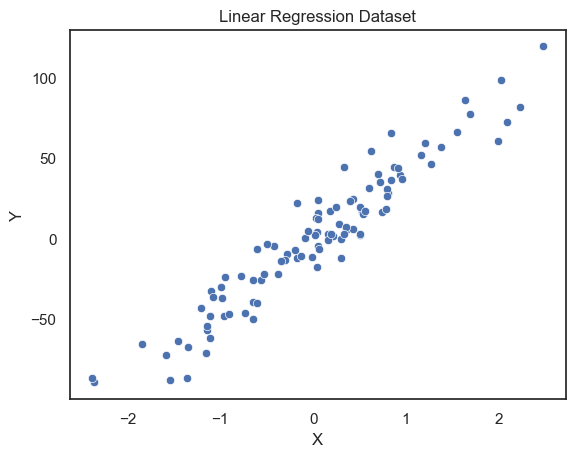

In [3]:
sns.scatterplot(x=X[:,0], y=y)
plt.title("Linear Regression Dataset")
plt.xlabel("X")
plt.ylabel("Y")

## *RMSE* Equation

**Error**: The difference between a predicted value and the actual value.

Squared Error: Error value is squared for each prediction.

Mean: Divided by the number of samples.

Root: Square Root of the Mean Squared error is computed.

Equation of RMSE:

$$ \text{RMSE} = \sqrt{\frac{ \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 }{N}} $$

where $ \hat{y}_i $ is the predicted value for the $ i^{th} $ data point, $ y_i $ is the $ i^{th} $ element from the population, and $ N $ is the population size.

Text(0, 0.5, 'Y')

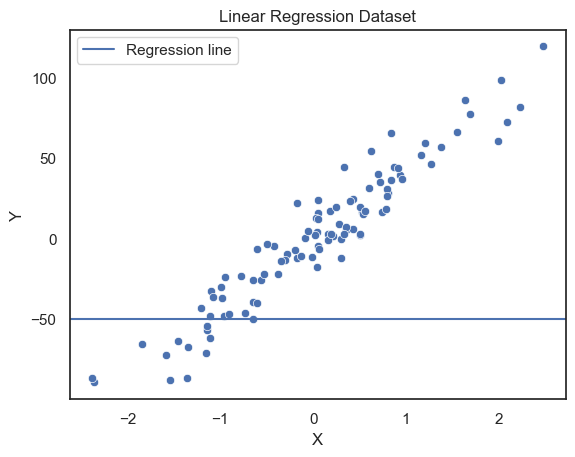

In [4]:
slope, bias = 0, -50

sns.scatterplot(x=X[:,0], y=y)
plt.axline((0, bias), slope=slope, color='C0', label='Regression line')
plt.title("Linear Regression Dataset")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")

Let's assume our line is the one shown above with slope = m = 0, and bias = -50.

In [5]:
def root_mean_squared_error(y_truth, y_pred):
    n_samples = y_truth.shape[0]
    return np.sqrt(np.sum(np.power((y_truth - y_pred), 2)) / n_samples)


def predict(X, slope, intercept):
    slope = np.array([slope])
    intercept = np.array(intercept)
    return np.dot(X, slope) + intercept


y_pred = predict(X, slope=slope, intercept=bias)
rmse = root_mean_squared_error(y_truth=y, y_pred=y_pred)
sklearn_rmse = metrics.root_mean_squared_error(y_true=y, y_pred=y_pred)

print("Root Mean Squared Error (for m = {slope}, intercept = {intercept}): ".format(slope=slope, intercept=bias))
print("\tFrom scratch: \t\t{}".format(rmse))
print("\tUsing Sklearn.metrics: \t{}".format(sklearn_rmse))

Root Mean Squared Error (for m = 0, intercept = -50): 
	From scratch: 		66.93236346315055
	Using Sklearn.metrics: 	66.93236346315055


Let's fit a linear model and check it's *MSE*.

Weights: [42.51715605] Biases: -0.6187640292899286


Text(0, 0.5, 'Y')

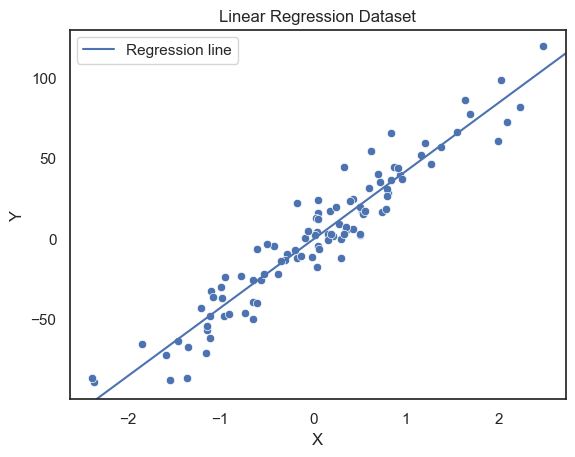

In [6]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X, y)
print("Weights:", lin_reg.coef_, "Biases:", lin_reg.intercept_)

sns.scatterplot(x=X[:,0], y=y)
plt.axline((0, lin_reg.intercept_), slope=lin_reg.coef_[0], color='C0', label='Regression line')
plt.title("Linear Regression Dataset")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")

In [7]:
y_pred = lin_reg.predict(X)

rmse = root_mean_squared_error(y_truth=y, y_pred=y_pred)
sklearn_rmse = metrics.root_mean_squared_error(y_true=y, y_pred=y_pred)

print("Root Mean Squared Error (for m = {slope}, intercept = {intercept}): ".format(slope=lin_reg.coef_[0], intercept=lin_reg.intercept_))
print("\tFrom scratch: \t\t{}".format(rmse))
print("\tUsing Sklearn.metrics: \t{}".format(sklearn_rmse))

Root Mean Squared Error (for m = 42.517156053506994, intercept = -0.6187640292899286): 
	From scratch: 		12.567623869141439
	Using Sklearn.metrics: 	12.567623869141439


## Conclusion
We covered the what (what is RMSE and it's formula), and the how (how to use sklearn to calculate it or, how to calculate RMSE metric from scratch). Now, let's cover the why?

### Why
RMSE unlike MAE is a differentiable error function, and thus can be used as a loss function for optimization.

### Why is it used
- RMSE is differentiable.

- It's not robust to outliers, and penalizes Outliers. This turns into an advantage if large errors are particularly undesirable.

- It's a simple and easy to understand metric.

- It's interpretability is higher than that of MSE as RMSE is of the same units as that of the target / label.

## References
1. Root Mean Squared Deviation https://en.wikipedia.org/wiki/Root_mean_square_deviation
2. CampusX - Regression Metrics https://www.youtube.com/watch?v=Ti7c-Hz7GSM